In [62]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, on="city")

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

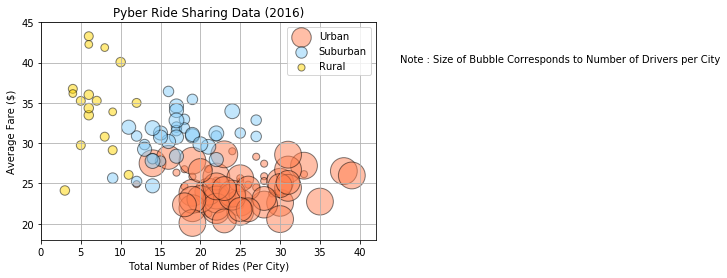

In [63]:
# Obtain the x and y coordinates for each of the three city types
pyber_urban = pyber_df.loc[pyber_df["type"]=="Urban"]
pyber_suburban = pyber_df.loc[pyber_df["type"]=="Suburban"]
pyber_rural = pyber_df.loc[pyber_df["type"]=="Rural"]

pyber_urban_grpd = pyber_urban.groupby("city")
pyber_suburban_grpd = pyber_suburban.groupby("city")
pyber_rural_grpd = pyber_rural.groupby("city")

urban_avg_fare = pyber_urban_grpd["fare"].mean()
suburban_avg_fare = pyber_suburban_grpd["fare"].mean()
rural_avg_fare = pyber_rural_grpd["fare"].mean()

urban_rides = pyber_urban_grpd["ride_id"].count()
suburban_rides = pyber_suburban_grpd["ride_id"].count()
rural_rides = pyber_rural_grpd["ride_id"].count()

urban_df = pd.DataFrame({"Number of Fares":urban_rides,
                         "Average Fare per City":urban_avg_fare})
urban_df.head()
suburban_df = pd.DataFrame({"Number of Fares":suburban_rides,
                         "Average Fare per City":suburban_avg_fare})
suburban_df.head()
rural_df = pd.DataFrame({"Number of Fares":rural_rides,
                         "Average Fare per City":rural_avg_fare})
rural_df
# Build the scatter plots for each city types
plt.scatter(urban_rides, urban_avg_fare, marker="o", facecolors="coral", s=pyber_urban["driver_count"]*10,
            edgecolors="black", alpha=.5, label="Urban")
plt.scatter(suburban_rides, suburban_avg_fare, marker="o", facecolors="#87CEFA", s=pyber_suburban["driver_count"]*10, 
            edgecolors="black", alpha=.5, label="Suburban")
plt.scatter(rural_rides, rural_avg_fare, marker="o", facecolors="gold",s=pyber_rural["driver_count"]*10, 
            edgecolors="black",alpha=.5, label="Rural")
# Incorporate the other graph properties
plt.grid(b=True)
plt.ylim(18,45)
plt.xlim(0, 42)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
# Create a legend
plt.legend(loc="best")
# Incorporate a text label regarding circle size
plt.text(x=45,y=40,s="Note : Size of Bubble Corresponds to Number of Drivers per City")
# Save Figure
plt.savefig("Output/Pyber_Ride_Sharing_Data_Scatter.png")

In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

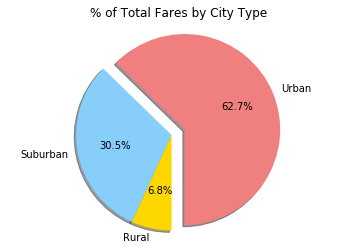

In [64]:
# Calculate Type Percents
tot_urban_fares = pyber_urban["fare"].sum()
tot_suburban_fares = pyber_suburban["fare"].sum()
tot_rural_fares = pyber_rural["fare"].sum()
fare_type =["Urban", "Suburban","Rural"]
fare_amounts = [tot_urban_fares, tot_suburban_fares, tot_rural_fares]
colors = ["lightcoral","lightskyblue","gold"]
explode = (0.15,0,0)
# Build Pie Chart
plt.pie(fare_amounts, explode=explode, labels=fare_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("Output/%_Of_Fares.png")

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

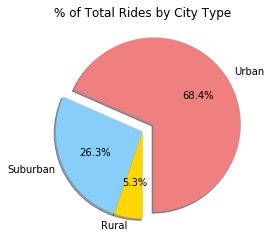

In [65]:
# Calculate Ride Percents
tot_urban_rides = pyber_urban["ride_id"].count()
tot_suburban_rides = pyber_suburban["ride_id"].count()
tot_rural_rides = pyber_rural["ride_id"].count()
city_type =["Urban", "Suburban","Rural"]
ride_type = [tot_urban_rides, tot_suburban_rides, tot_rural_rides]
colors = ["lightcoral","lightskyblue","gold"]
explode = (0.15,0,0)
# Build Pie Chart
plt.pie(ride_type, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.axis()
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Output/%_Of_Rides.png")

In [37]:
# Show Figure
plt.show()

## Total Drivers by City Type

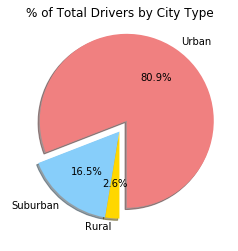

In [66]:
# Calculate Driver Percents
# Use only the city data dataframe for this calculation

urban_driver_count = city_df.loc[city_df["type"]=="Urban"]
suburban_driver_count = city_df.loc[city_df["type"]=="Suburban"]
rural_driver_count = city_df.loc[city_df["type"]=="Rural"]

tot_urban_drivers = urban_driver_count["driver_count"].sum()
tot_suburban_drivers = suburban_driver_count["driver_count"].sum()
tot_rural_drivers = rural_driver_count["driver_count"].sum()

city_driver_type =["Urban", "Suburban","Rural"]
driver_type = [tot_urban_drivers, tot_suburban_drivers, tot_rural_drivers]
colors = ["lightcoral","lightskyblue","gold"]
explode = (0.15,0,0)

# Build Pie Charts
plt.pie(driver_type, explode=explode, labels=city_driver_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.axis()
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("Output/%_Of_Drivers.png")

In [ ]:
# Show Figure
plt.show()

### Pyber Data Analysis Conclusions

* Our analysis indicates a number of very noticible trends in ride sharing. 

* The most notable trend is that the largest number of rides take place in the urban environment. As we see approximately 68% of the rides taken over the course of 2016 were in urban cities.

* Another notable trend is that while rural trips are the least frequently occuring trips they do have the highest average fare. This is perhaps not surprising given that rural cities would largely require longer trips that would likely result in higher overall fares.

* Lastly we can see that urban environments have the largest concentration of drivers. More than 80% of drivers are in the urban environment. This goes hand in hand with the larger number of fares taking place in the urban environments. It is also possible that this conentration of drivers is the reason for some of our other observable trends regarding average fares and number of rides.

* Ultimately more research would need to be done to determine cause and effect of the observed trends.